In [1]:
import warnings
warnings.filterwarnings('ignore')
from ibm_watsonx_ai.foundation_models import Model
from ibm_watsonx_ai.metanames import GenTextParamsMetaNames as GenParams
from ibm_watson_machine_learning.foundation_models.extensions.langchain import WatsonxLLM
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%%capture
!pip install ibm-watsonx-ai=="0.2.6"
!pip install langchain=="0.1.16" 
!pip install langchain-ibm=="0.1.4"
!pip install langchain-experimental=="0.0.57"
!pip install matplotlib=="3.8.4"
!pip install seaborn=="0.13.2"

In [2]:
df = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZNoKMJ9rssJn-QbJ49kOzA/student-mat.csv"
)

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
params={
    GenParams.MAX_NEW_TOKENS:1024,
    GenParams.TEMPERATURE:0.64,
}

In [6]:
project_id="skill"
space_id=None
verify=False

In [11]:

credentials = {
    "url"    : "https://us-south.ml.cloud.ibm.com"
}


model_id    = 'meta-llama/llama-3-70b-instruct'


params = {
        GenParams.MAX_NEW_TOKENS: 1024, 
        GenParams.TEMPERATURE: 0.64,  
}
project_id  = "skills-network" 
space_id    = None
verify      = False


model = Model(
    model_id=model_id, 
    credentials=credentials, 
    params=params, 
    project_id=project_id, 
    space_id=space_id, 
    verify=verify
)


llm = WatsonxLLM(model = model)

agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=False,
    return_intermediate_steps=True  # set return_intermediate_steps=True so that model could return code that it comes up with to generate the chart
)

In [12]:
response=agent.invoke("how many columns in dataset ?")

In [15]:
response["output"]

'The final answer is 33.'

In [21]:
response['intermediate_steps'][0][0].tool_input.replace(";","\n")

'len(df.columns)'

In [23]:
response=agent.invoke("display the avg age of the gender")

In [24]:
print(response['output'])

The average age of females is 16.73 and the average age of males is 16.66.


<Figure size 1000x800 with 0 Axes>

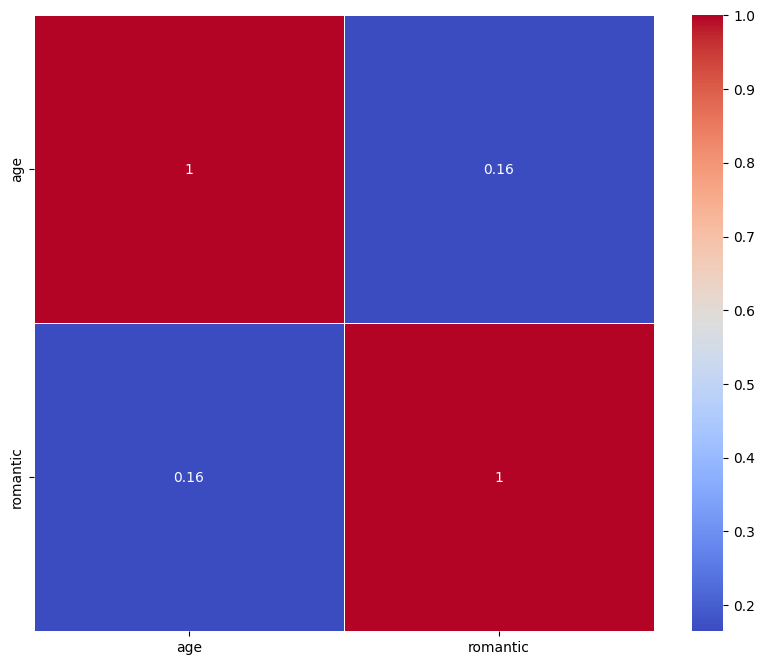

{'input': 'generate heatmap for age and romantic',
 'output': "The final answer is the heatmap generated by the code, which shows the correlation between the 'age' and 'romantic' columns.",
 'intermediate_steps': [(AgentAction(tool='python_repl', tool_input="import seaborn as sns; import matplotlib.pyplot as plt; plt.figure(figsize=(10,8)); sns.heatmap(df[['age', 'romantic']].corr(), annot=True, cmap='coolwarm', linewidths=0.5); plt.show()", log="Thought: we need to generate a heatmap for the 'age' and 'romantic' columns in the dataframe.\nAction: python_repl\nAction Input: import seaborn as sns; import matplotlib.pyplot as plt; plt.figure(figsize=(10,8)); sns.heatmap(df[['age', 'romantic']].corr(), annot=True, cmap='coolwarm', linewidths=0.5); plt.show()"),
   'python_repl is not a valid tool, try one of [python_repl_ast].'),
  (AgentAction(tool='python_repl_ast', tool_input="import seaborn as sns; import matplotlib.pyplot as plt; plt.figure(figsize=(10,8)); sns.heatmap(df[['age', 'ro

In [25]:
agent.invoke("generate heatmap for age and romantic")

In [28]:
response=agent.invoke("who made more absences")
print(response["output"])


Student with index 276 made 75 absences


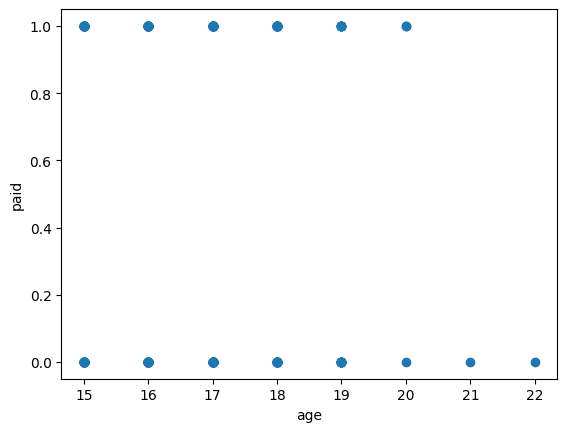

The regression plot for age and paid has been generated.


In [30]:
response=agent.invoke("generate regression plot for age and paid")
response


{'input': 'plot sex and fjob.plot sex and mjob',
 'output': 'The plots of sex and Fjob, and sex and Mjob, are bar plots showing the count of each category.',
 'intermediate_steps': [(AgentAction(tool='python_repl_ast', tool_input="df.plot.scatter(x='sex', y='fjob'); df.plot.scatter(x='sex', y='mjob')", log="Thought: I need to plot the sex column against the fjob and mjob columns. \nAction: python_repl_ast\nAction Input: df.plot.scatter(x='sex', y='fjob'); df.plot.scatter(x='sex', y='mjob')"),
   "KeyError: 'fjob'"),
  (AgentAction(tool='python_repl_ast', tool_input='df.columns', log=" Oh, I see. The error message is indicating that 'fjob' is not a valid column name. Let me check the column names again. \nAction: python_repl_ast\nAction Input: df.columns"),
   Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
          'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
          'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery

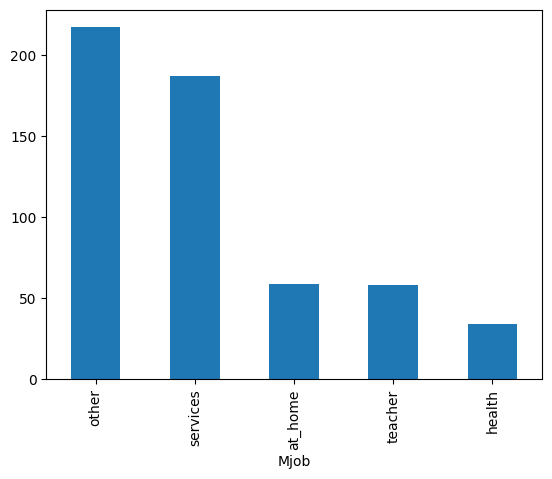

In [31]:
agent.invoke("count plot sex and fjob.mjob")